<a href="https://colab.research.google.com/github/tanakakao/test/blob/main/vgg_keras2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.datasets import cifar10
import numpy as np
import cv2

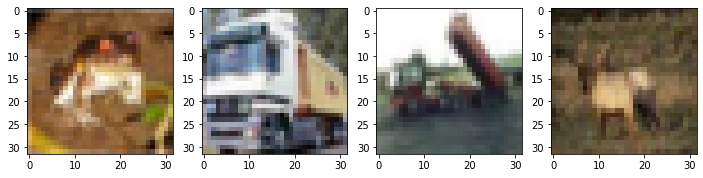

In [2]:
# データセットの読み込み
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# バッチサイズ、クラス数、エポック数の設定
batch_size=64
num_classes=10
epochs=20

# データリサイズ
img_rows=224
img_cols=224

#x_train = np.array([cv2.resize(img, (img_rows,img_cols)) for img in x_train[::10,:,:,:]])
#x_test = np.array([cv2.resize(img, (img_rows,img_cols)) for img in x_test[::10,:,:,:]])

# データ正規化
x_train=x_train.astype('float32')
x_train/=255
x_test=x_test.astype('float32')
x_test/=255

# one-hotベクトル化
y_train = y_train[::1]
y_test = y_test[::1]
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(12,3))
[axes[i].imshow(x_train[i]) for i in range(4)];

In [3]:
input_shape=(32, 32, 3)

model = Sequential()

# 第1層
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', input_shape=input_shape, name='block1_conv1'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', name='block1_conv2'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same', name='block1_pool'))

# 第2層
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', name='block2_conv1'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', name='block2_conv2'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same', name='block2_pool'))

# 第3層
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', name='block3_conv1'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', name='block3_conv2'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', name='block3_conv3'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', name='block3_conv4'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same', name='block3_pool'))

# 第4層
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', name='block4_conv1'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', name='block4_conv2'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', name='block4_conv3'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', name='block4_conv4'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same', name='block4_pool'))

# 第5層
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', name='block5_conv1'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', name='block5_conv2'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', name='block5_conv3'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', name='block5_conv4'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same', name='block5_pool'))

# 全結合層
model.add(Flatten(name='flatten'))
model.add(Dense(units=4096, activation='relu', name='fc1'))
model.add(Dropout(0.5))
model.add(Dense(units=4096, activation='relu', name='fc2'))
model.add(Dropout(0.5))

# 出力層
model.add(Dense(units=num_classes, activation='softmax', name='predictions'))

In [4]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.1, 
    patience=20, 
    min_lr=0.0001,
    verbose=2
)

sgd = SGD(lr=0.01)
adam=Adam(lr=0.01)

model.compile(loss=['categorical_crossentropy'], optimizer=Adam(), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [5]:
history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/20
782/782 [==============================] - 33s 38ms/step - loss: 2.0091 - accuracy: 0.2002 - val_loss: 2.1070 - val_accuracy: 0.1899
Epoch 2/20
782/782 [==============================] - 29s 37ms/step - loss: 1.6780 - accuracy: 0.3213 - val_loss: 1.7291 - val_accuracy: 0.3172
Epoch 3/20
782/782 [==============================] - 29s 37ms/step - loss: 1.5158 - accuracy: 0.3913 - val_loss: 1.5648 - val_accuracy: 0.4205
Epoch 4/20
782/782 [==============================] - 29s 37ms/step - loss: 1.3639 - accuracy: 0.4757 - val_loss: 1.4234 - val_accuracy: 0.4529
Epoch 5/20
782/782 [==============================] - 29s 37ms/step - loss: 1.1547 - accuracy: 0.5802 - val_loss: 1.4450 - val_accuracy: 0.4854
Epoch 6/20
782/782 [==============================] - 29s 37ms/step - loss: 0.9415 - accuracy: 0.6720 - val_loss: 1.2952 - val_accuracy: 0.5660
Epoch 7/20
782/782 [==============================] - 29s 37ms/step - loss: 0.8193 - accuracy: 0.7220 - val_loss: 0.9909 - val_accuracy: